###### K-Means algorithm is a special case of Expectation Maximisation Algorithm

#### Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs # generates isotropic gaussian blobs for clustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

#### Dataset Preparation

In [2]:
X,y = make_blobs(n_samples=500, n_features=2,centers=5, cluster_std=1,random_state=10)

# X contains 500 samples with 2 features each.
# y values tells samples in X belong to which cluster.
print(X.shape, y.shape)    

(500, 2) (500,)


#### Dataset Visualization

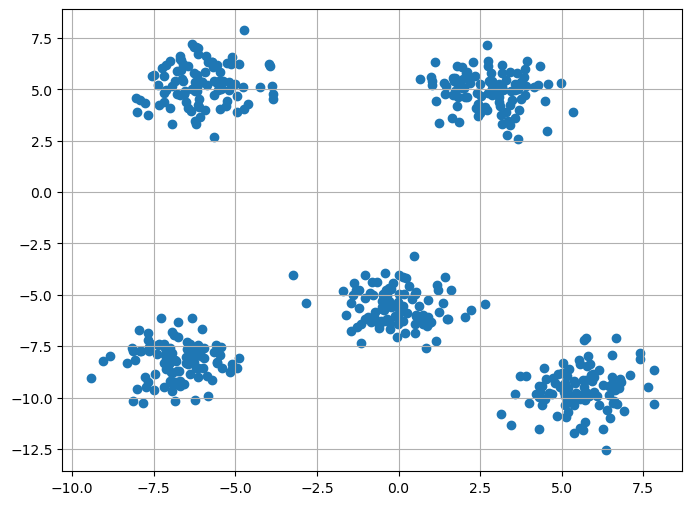

In [3]:
plt.figure(figsize=(8,6))
plt.grid()
plt.scatter(X[:,0],X[:,1])
plt.show()

We can notice we have five clusters as we passed a parameter in make_blobs and set centers=5 and each cluster having standard deviation of 1. We need to identify these cluster centers on our own using a suitable algorithm.

##### Step 1: Assigning random centers to the center

In [4]:
k = 5  # number of clusters

color = ["red", "green", "yellow", "blue", "orange"] # colour that can be given to clusters

clusters = {} # A dictionary made to store cluster info

# Initialize k random points as the centriod
for i in range(k):
    # To initialize with a random centers within a range (-10,10) 
    center = 10.0*(2*np.random.random((X.shape[1],))-1)
    
    print(f"\nCo-ordinates of randomly initialized centroid {i+1} is:\n", center)
    
    points = []
    ''' A cluster dictionary holds the center assigned to the cluster, the label(colour) assigned to the cluster, and a list
     containing the points/samples associated with the cluster. '''
    
    cluster = {
        'center': center,
        'points':  points,
        'colour':color[i]
        }
    
    clusters[i]=cluster
    
print("\nCluster dictionary is:\n", clusters)


Co-ordinates of randomly initialized centroid 1 is:
 [-2.60515649  5.51983857]

Co-ordinates of randomly initialized centroid 2 is:
 [ 0.30969055 -8.88719432]

Co-ordinates of randomly initialized centroid 3 is:
 [ 9.91714572 -0.51599793]

Co-ordinates of randomly initialized centroid 4 is:
 [4.4234953  6.17852683]

Co-ordinates of randomly initialized centroid 5 is:
 [-2.40466848  0.82531533]

Cluster dictionary is:
 {0: {'center': array([-2.60515649,  5.51983857]), 'points': [], 'colour': 'red'}, 1: {'center': array([ 0.30969055, -8.88719432]), 'points': [], 'colour': 'green'}, 2: {'center': array([ 9.91714572, -0.51599793]), 'points': [], 'colour': 'yellow'}, 3: {'center': array([4.4234953 , 6.17852683]), 'points': [], 'colour': 'blue'}, 4: {'center': array([-2.40466848,  0.82531533]), 'points': [], 'colour': 'orange'}}


In [5]:
def euclidean_distance(v1,v2):
    '''Returns euclidean distance between two vectors'''
    return np.sqrt(np.sum((v1-v2)**2))

#### Step 2: The E-step (Assigning each sample to its nearest centroid / to one of the clusters)

In [6]:
def assignPointToClusters(clusters):
    # Loop runs for all the data sample points, here 500
    for i in range(X.shape[0]):
        distance = []
        curr_sample = X[i]
        # calculating the distance of the current sample from all the cluster one by one and storing it inside a distance list
        for j in range(k):
            dist = euclidean_distance(curr_sample, clusters[j]['center'])
            distance.append(dist)
        # returns the cluster to which current sample has least distance  
        curr_sample_cluster = np.argmin(distance)
        # adding the current sample/point to the cluster
        clusters[curr_sample_cluster]['points'].append(curr_sample)

def updateClusters(clusters): # M-step
    for i in range(k):
        pts = np.array(clusters[i]['points'])

        if pts.shape[0]>0: #If a cluster has non-zero points 
            new_u = pts.mean(axis=0)
            clusters[i]['center'] = new_u
            clusters[i]['points'] = [] # Clear the list
            
def plotClusters(clusters):
    
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        # Plotting the points
        # There can be a possibility that there are no points associated with a cluster as the distance in each case was not minimun
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[i]['colour'])
        except:
            pass
        
        # Plot the cluster centers
        uk = clusters[i]['center']
        plt.scatter(uk[0],uk[1],color = 'black', marker='*') 

###### Initial plot after randomly assigning the centers

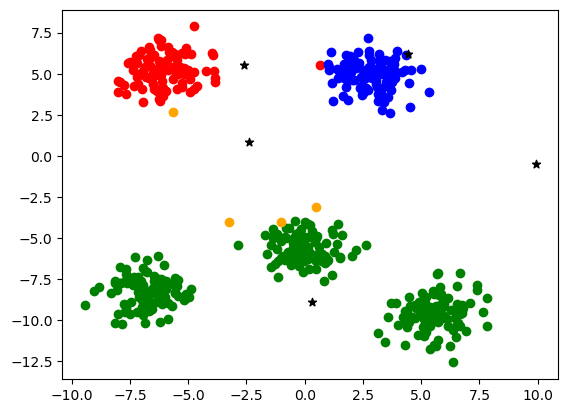

In [7]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

###### After updation 1

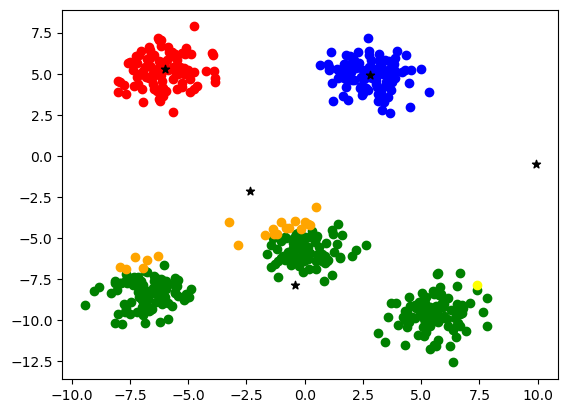

In [8]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

###### After updation 2

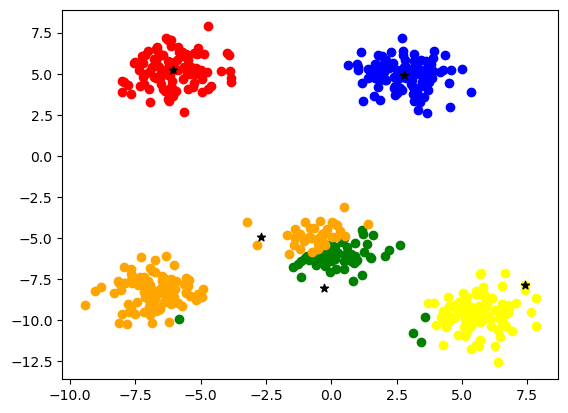

In [9]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

###### After updation 3

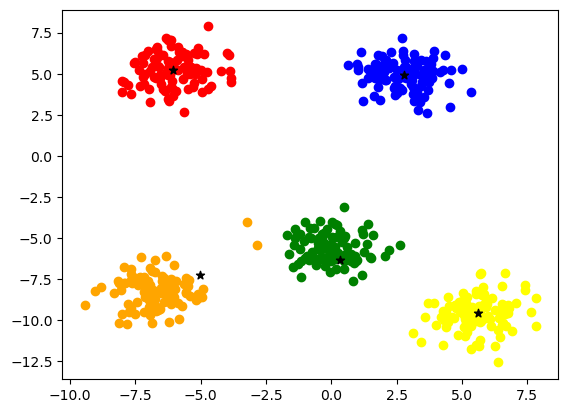

In [10]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

###### After updation 4

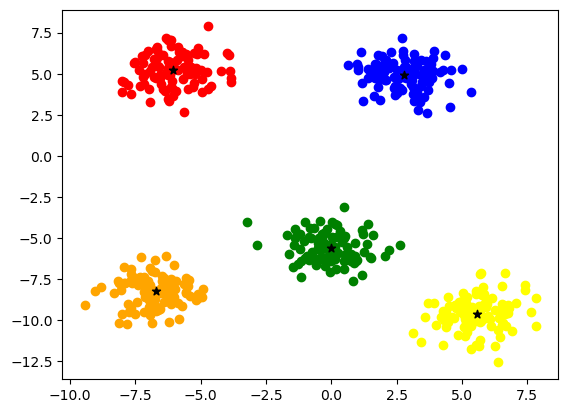

In [11]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

#### After updation 5

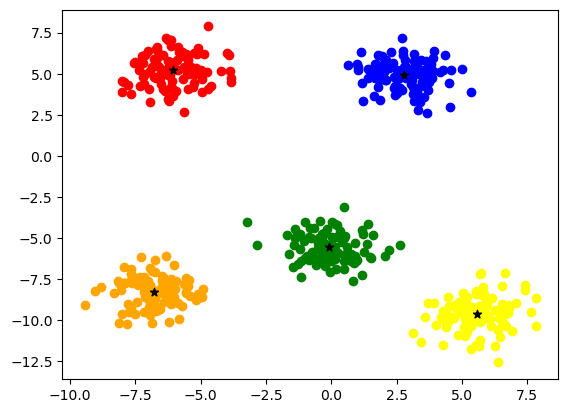

In [12]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

We can notice in last two updations, no significant changes have been onserved in the plots. So, we can conclude that our centers have converged.

### Using KMeans from the sklearn library

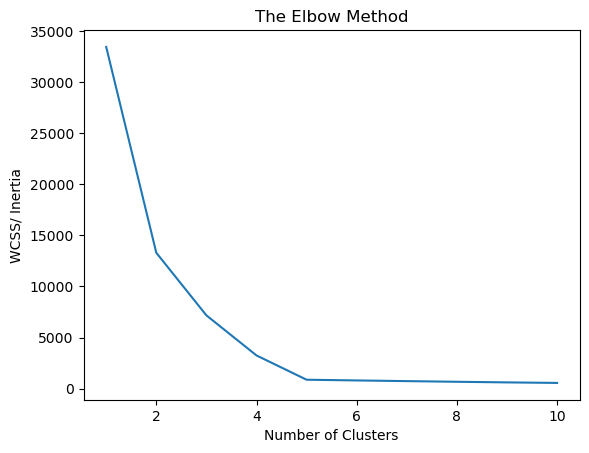

In [13]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    # Using the initialization method as k-means++ as it helps in faster convergance
    kmeans= KMeans(n_clusters=i, init='k-means++',random_state=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS/ Inertia')
plt.show()

From the elbow curve, we can observe the decrease in inertia stables down after number of clusters=5, hence we can see our k=5 is the optimal value.

In [14]:
clusters = KMeans(n_clusters=5, init='k-means++', random_state=10)
cluster_labels = clusters.fit_predict(X)
print(cluster_labels)

[0 2 1 0 2 4 0 1 4 3 4 4 2 2 3 2 3 4 4 0 4 0 1 0 3 0 3 2 0 0 2 2 3 2 4 1 4
 1 2 1 0 0 2 1 2 4 0 4 2 0 3 0 4 3 1 1 2 4 2 2 2 1 1 1 0 3 0 1 0 3 3 1 1 1
 0 0 3 1 1 2 1 2 0 4 0 1 2 3 4 2 2 1 0 2 4 1 2 0 2 3 0 3 3 3 1 2 0 1 4 2 3
 4 2 2 0 0 0 4 0 4 2 4 1 0 4 0 4 0 1 1 4 0 3 2 1 1 1 2 0 3 2 1 0 0 0 4 2 1
 4 4 1 3 4 4 3 0 3 2 3 0 2 2 2 3 2 2 4 1 0 0 0 0 0 1 1 3 0 1 1 2 2 4 2 2 2
 2 4 1 2 2 2 0 2 3 3 1 3 0 4 2 0 3 3 2 2 2 1 0 4 1 1 2 2 4 0 1 1 3 1 3 2 4
 2 1 0 4 3 3 3 3 1 3 3 4 3 3 1 1 0 0 3 2 1 1 1 2 2 0 3 3 3 0 0 2 3 3 3 4 0
 1 4 4 1 2 4 0 1 0 4 1 3 2 3 2 4 3 3 4 0 4 4 4 1 1 4 1 2 0 4 3 2 1 4 4 1 3
 1 3 4 3 4 1 3 1 2 2 4 3 4 2 1 2 1 2 1 1 3 4 1 1 2 3 1 4 3 1 1 3 4 1 3 1 0
 0 0 4 4 0 4 3 2 4 2 4 3 4 4 0 0 2 4 4 4 4 3 1 4 2 4 2 3 0 3 3 4 3 0 0 3 3
 0 3 4 0 3 1 3 4 4 4 4 4 1 0 2 2 2 0 0 4 4 3 3 1 0 1 1 2 4 2 3 4 0 0 0 4 3
 2 2 3 0 4 2 1 1 4 3 3 0 3 2 0 3 1 3 3 4 3 4 3 2 1 0 0 0 3 2 0 0 4 1 2 4 0
 2 0 4 4 0 1 0 4 0 1 3 0 4 1 0 0 2 0 0 2 2 2 3 1 1 2 0 1 2 1 1 1 3 4 4 4 1
 3 3 2 4 2 3 3 4 3 0 4 1 

### Using Silhoutte score to validate the number of clusters

For n_clusters = 2 The average silhouette_score is : 0.5798336868180719
For n_clusters = 3 The average silhouette_score is : 0.6126590337261955
For n_clusters = 4 The average silhouette_score is : 0.6987037504666347
For n_clusters = 5 The average silhouette_score is : 0.7790377910958655
For n_clusters = 6 The average silhouette_score is : 0.6916281414046364
For n_clusters = 7 The average silhouette_score is : 0.5928036353713844
For n_clusters = 8 The average silhouette_score is : 0.5018700572233271
For n_clusters = 9 The average silhouette_score is : 0.4137351816205314
For n_clusters = 10 The average silhouette_score is : 0.32629904773828416


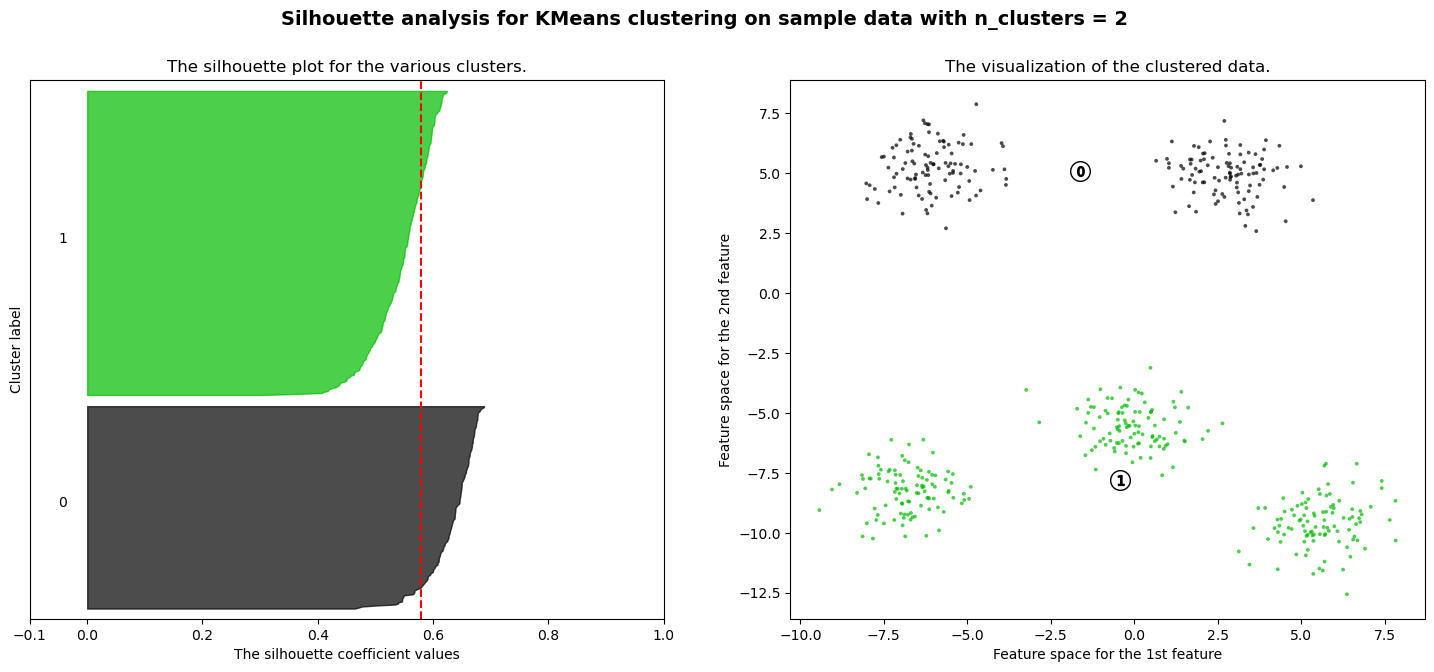

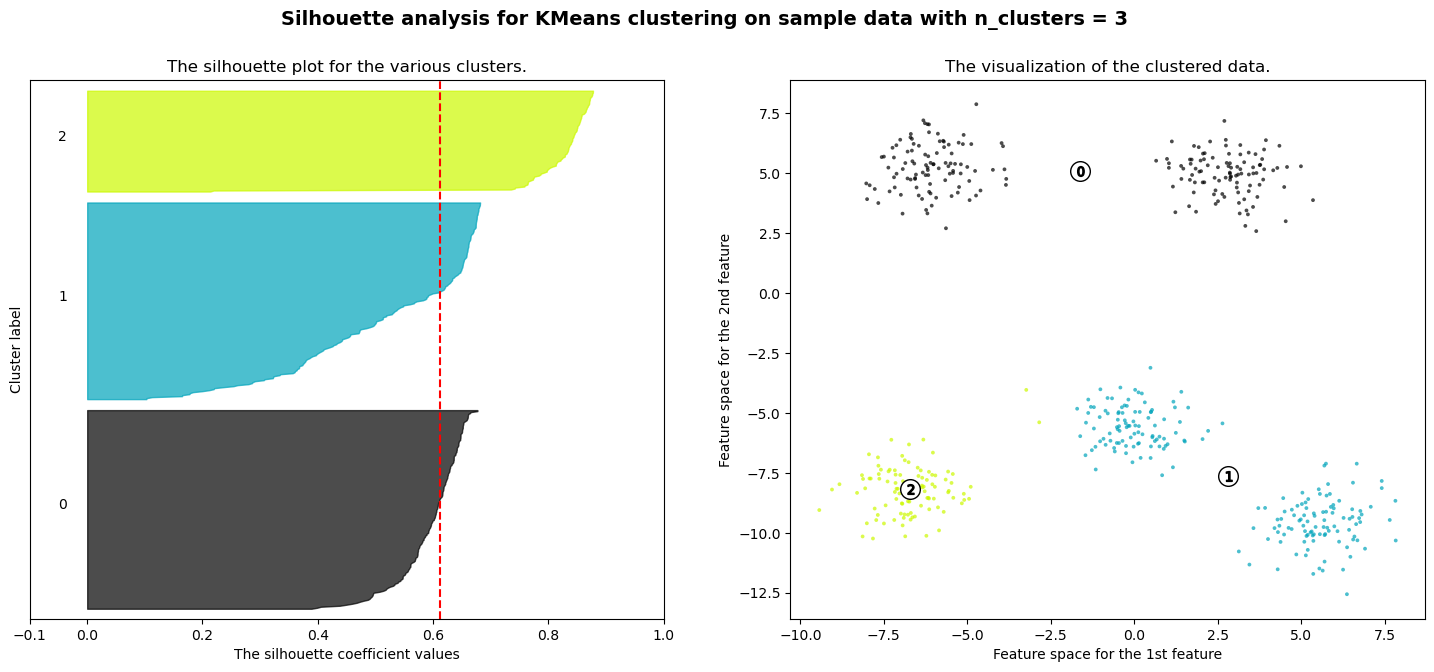

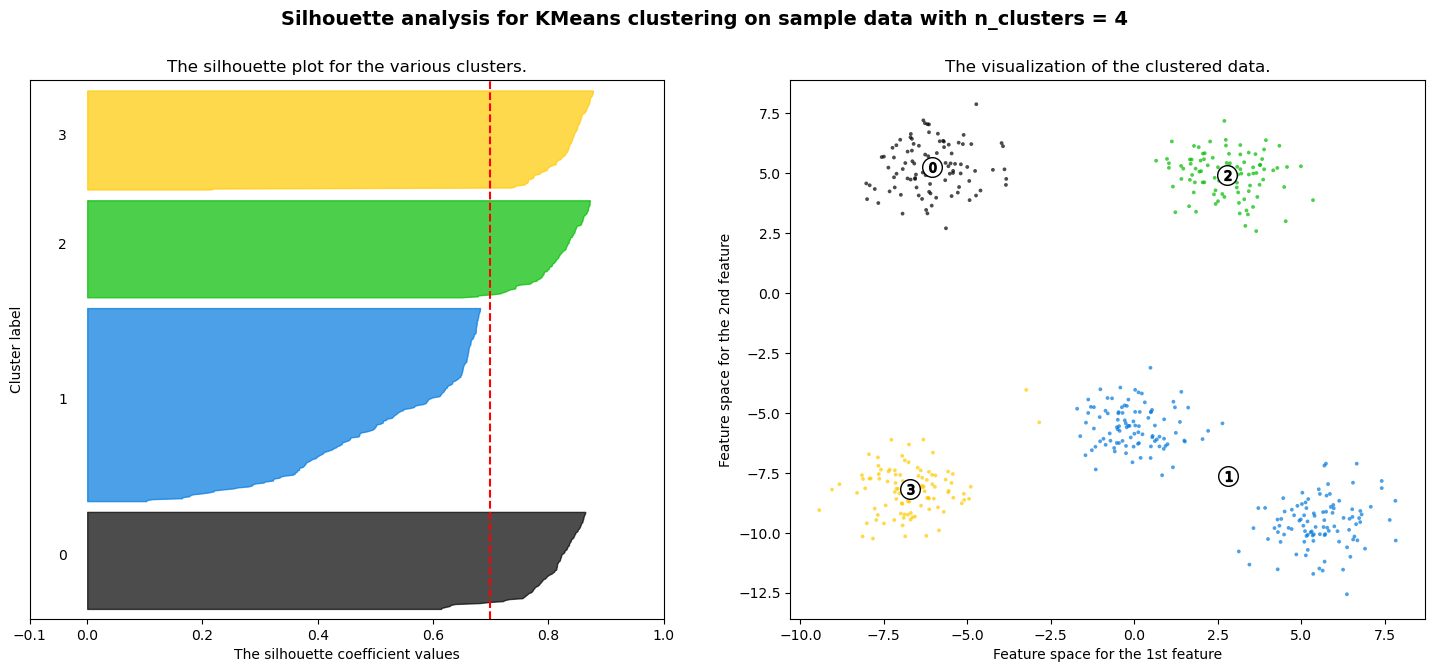

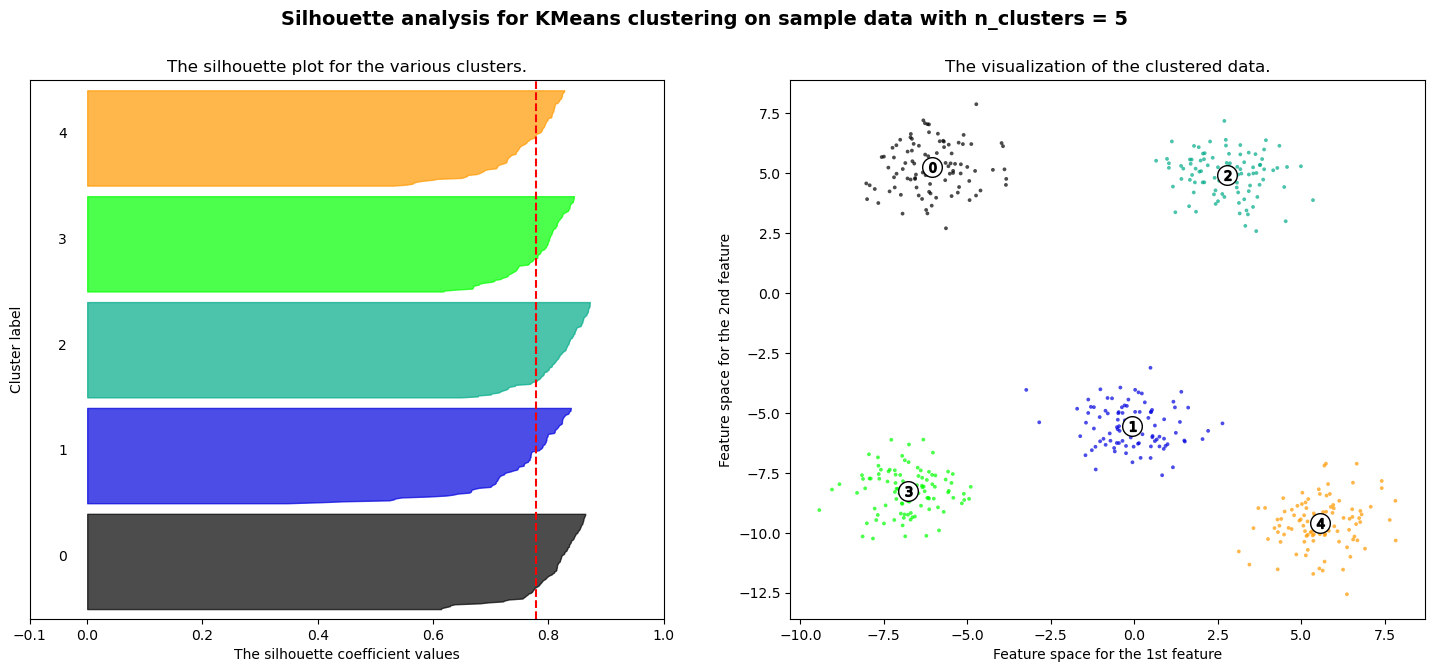

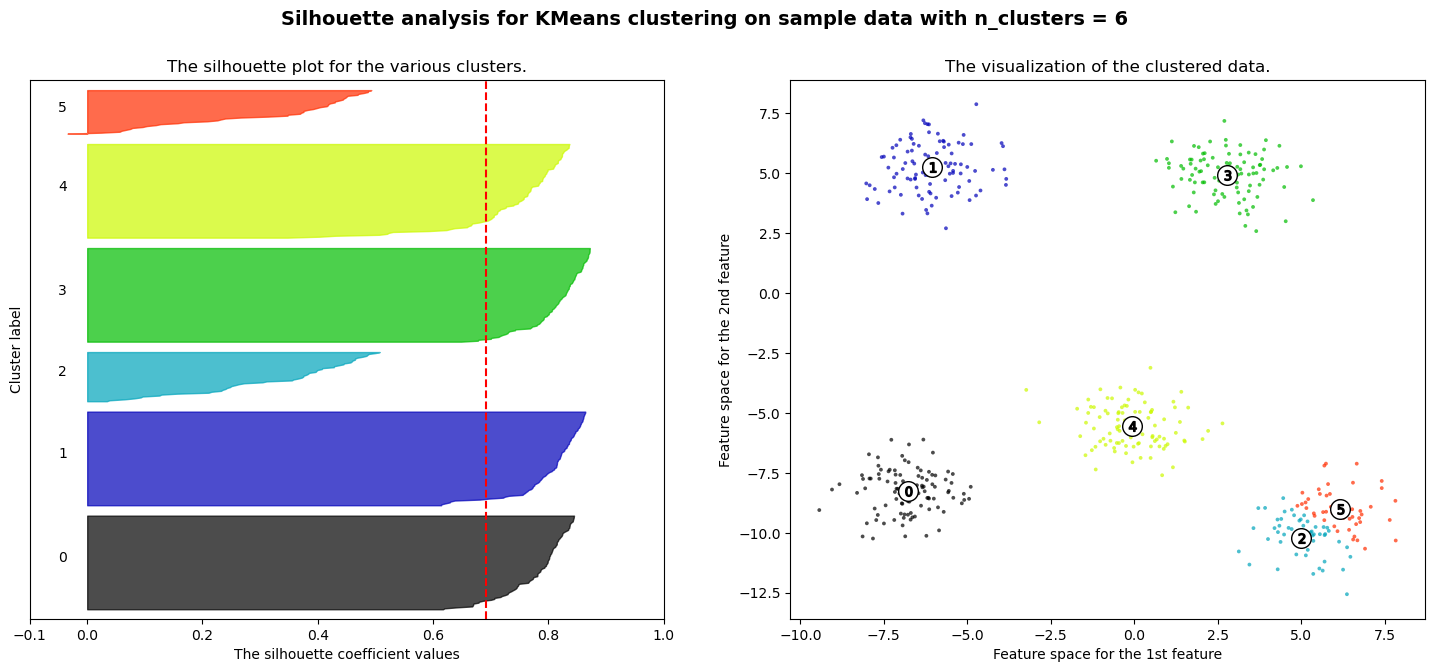

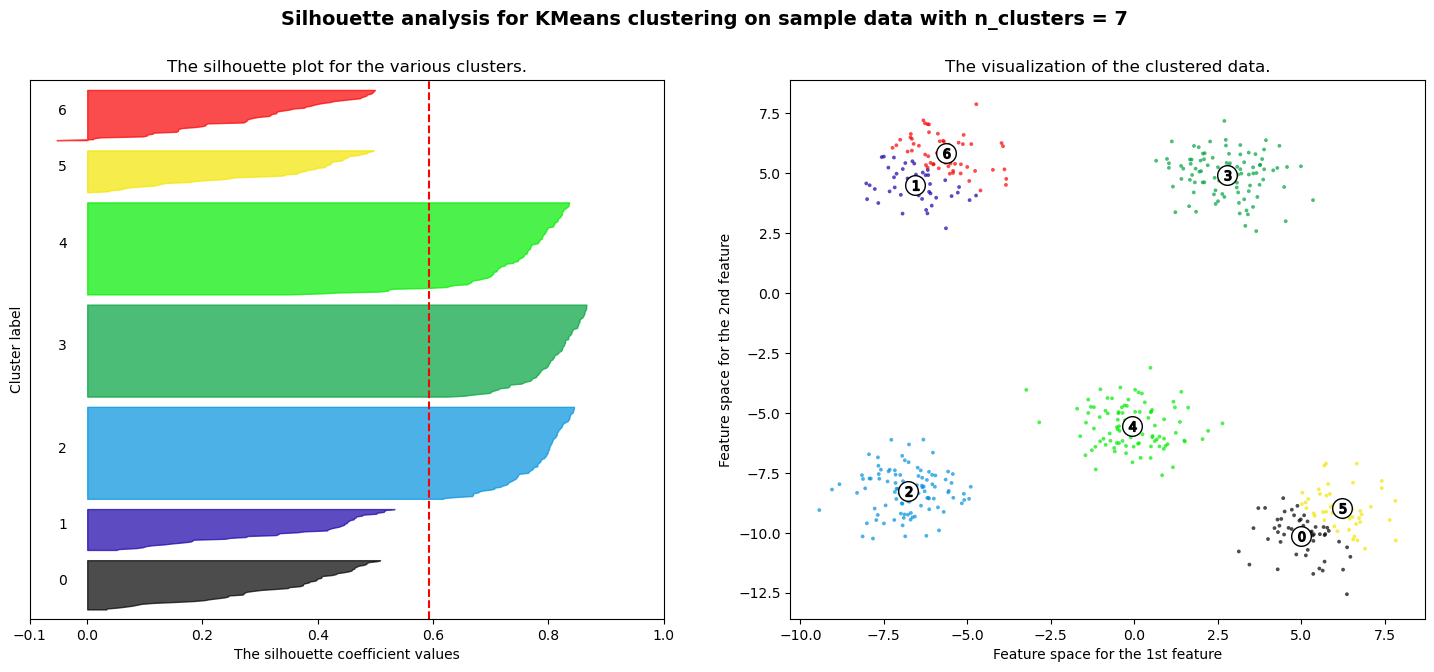

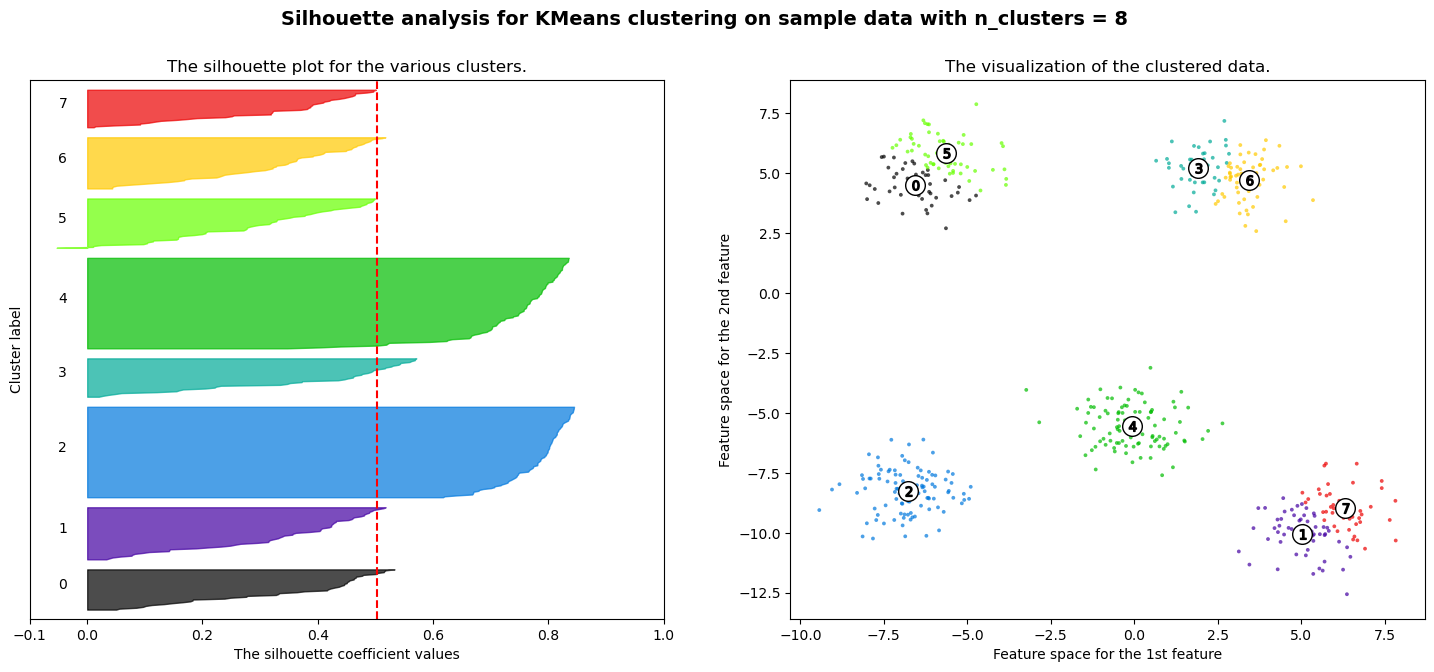

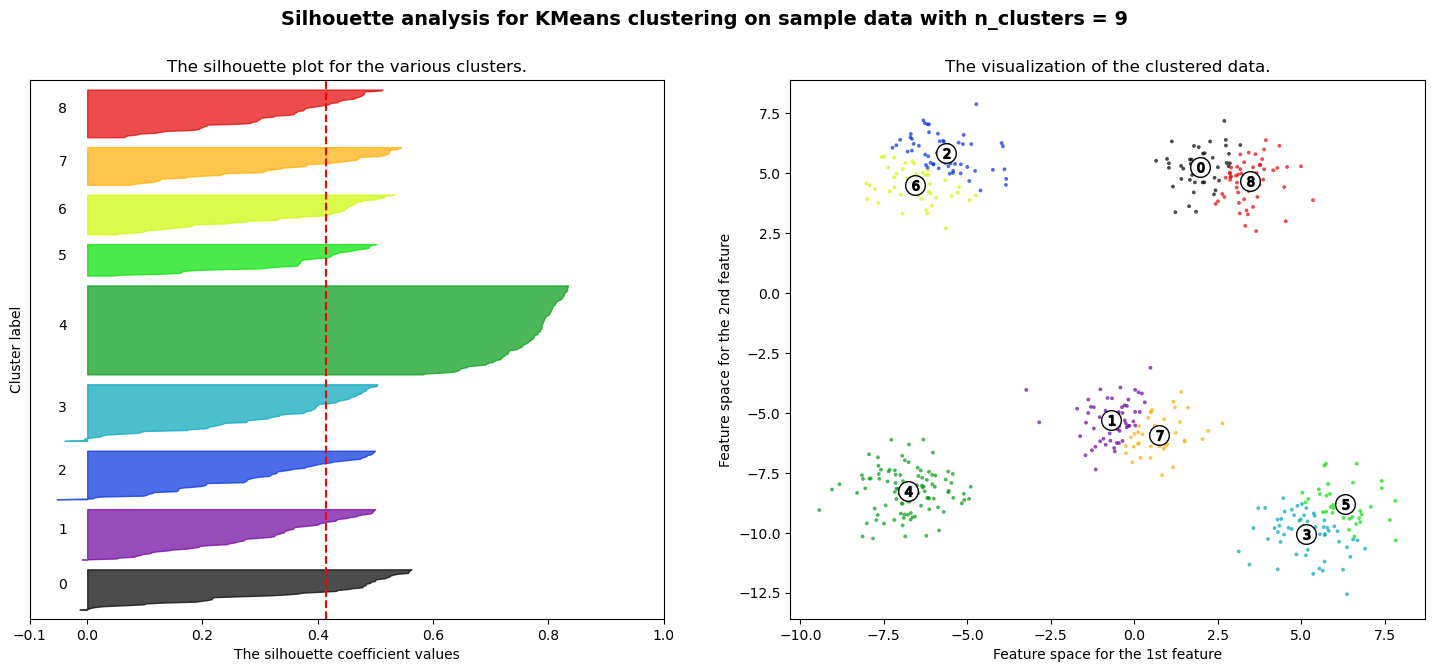

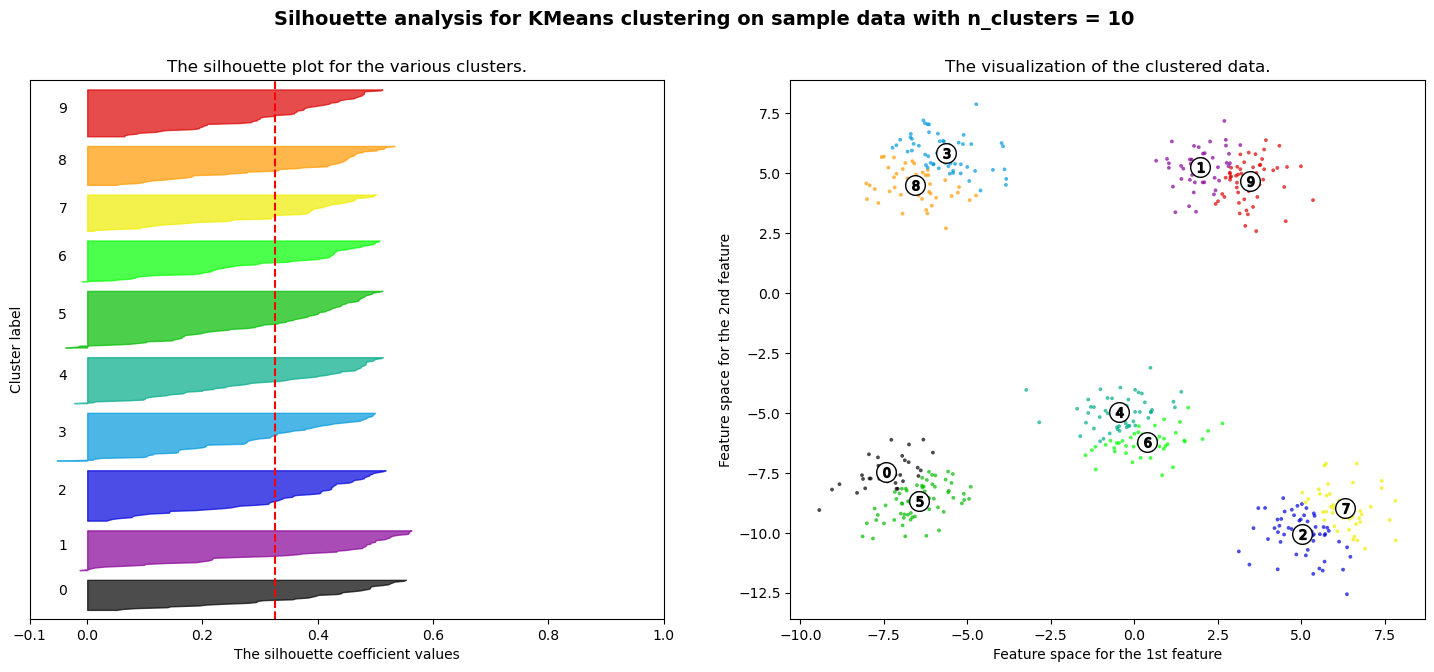

In [15]:
range_n_clusters = [i for i in range(2,11)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusters = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusters.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusters.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Using the silhoutte score and the plots, we can observe that the silhoutte score for n_cluster=5 was maximum, hence 5 is the optimal number of cluster for this dataset

### Using Davies-Bouldin index, calinski_harabasz_score

In [16]:
for n_clusters in range(2,11):
    clusters = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
    cluster_labels = clusters.fit_predict(X)
    db_index = davies_bouldin_score(X, cluster_labels)
    print(f"Davies-Bouldin Index for k {n_clusters} is: {db_index}")

Davies-Bouldin Index for k 2 is: 0.741985210656855
Davies-Bouldin Index for k 3 is: 0.5682194844773732
Davies-Bouldin Index for k 4 is: 0.42118821033551923
Davies-Bouldin Index for k 5 is: 0.3041528085877726
Davies-Bouldin Index for k 6 is: 0.5795215761599001
Davies-Bouldin Index for k 7 is: 0.7932889648072762
Davies-Bouldin Index for k 8 is: 0.931093393796308
Davies-Bouldin Index for k 9 is: 1.0445174339610452
Davies-Bouldin Index for k 10 is: 1.1511434970790033


Using the **davies-bouldin index**, we can observe that the score for n_cluster=5 was minimum, hence 5 is the optimal number of cluster for this dataset

### Using Calinski-Harabasz index

In [17]:
for n_clusters in range(2,11):
    clusters = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
    cluster_labels = clusters.fit_predict(X)
    ch_index = calinski_harabasz_score(X, cluster_labels)
    print(f"Calinski-Harabasz Index for k {n_clusters} is: {ch_index}")

Calinski-Harabasz Index for k 2 is: 754.3901888912743
Calinski-Harabasz Index for k 3 is: 910.273738699547
Calinski-Harabasz Index for k 4 is: 1536.5431476591227
Calinski-Harabasz Index for k 5 is: 4616.145444139741
Calinski-Harabasz Index for k 6 is: 4014.2307357494115
Calinski-Harabasz Index for k 7 is: 3649.1459342357384
Calinski-Harabasz Index for k 8 is: 3426.693066187924
Calinski-Harabasz Index for k 9 is: 3290.7059254696555
Calinski-Harabasz Index for k 10 is: 3195.43476855766


Using the **Calinski-Harabasz** index, we can observe that the score for n_cluster=5 was maximum, hence 5 is the optimal number of cluster for this dataset